# <a id='toc1_'></a>[Introduction](#toc0_)


This case study focuses on developing a predictive model for taxi fare amounts in New York City using the 2017 Yellow Taxi Trip Dataset. The primary objective is to help taxi drivers estimate fare amounts before taking trips, ultimately enabling better decision-making and revenue optimization.



## <a id='toc1_1_'></a>[Project Overview](#toc0_)
**Business Problem:** Taxi drivers need a reliable way to predict fare amounts before accepting rides
Data Source: 2017 Yellow Taxi Trip Data, containing detailed trip information including pickup/dropoff times, locations, payment types, and fare amounts
**Methodology:** 
Using machine learning techniques, specifically regression modeling, to predict fare amounts based on various trip features
**Key Features:** 
The analysis considers multiple factors including:
- Trip distance and duration
- Pickup and dropoff locations
- Time-based features (rush hours, day of week, month)
- Payment methods


## <a id='toc1_2_'></a>[Project Goals](#toc0_)
- Develop an accurate fare prediction model
- Identify key factors influencing fare amounts
- Provide actionable insights for taxi drivers to optimize their earnings
- Analyze the relationship between payment methods and fare amounts


This notebook will walk through the complete data science process, from initial data exploration and cleaning to feature engineering and model development, concluding with practical recommendations for taxi operators.

# <a id='toc2_'></a>[Import packages](#toc0_)

**Default Notebook Imports**

In [61]:
# Core data manipulation and analysis
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Statistical analysis
from scipy import stats

# Date handling
from datetime import datetime, date, timedelta  # Combined imports

# Machine Learning imports
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import (
    mean_absolute_error,
    r2_score,
    mean_squared_error,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    RocCurveDisplay,
    roc_auc_score,
    roc_curve
)
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

# XGBoost
try:
    from xgboost import XGBClassifier, plot_importance
except ImportError:
    print("XGBoost is not installed. Run 'pip install xgboost' to install it.")

# Set default plotting style
plt.style.use('seaborn')

#Load dataset into dataframe
df = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')
print("done")

XGBoost is not installed. Run 'pip install xgboost' to install it.


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24560\2105881498.py:42: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


done


**Kaggle Imports**

In [62]:
# import numpy as np 
# import pandas as pd 
# import seaborn as sns
# import matplotlib.pyplot as plt
# from scipy import stats

# from datetime import datetime
# from datetime import date
# from datetime import timedelta

# import sklearn.metrics as metrics
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import GridSearchCV,train_test_split
# from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error,accuracy_score,precision_score, \
#     recall_score,f1_score,confusion_matrix,ConfusionMatrixDisplay,RocCurveDisplay,roc_auc_score, roc_curve
# from sklearn.linear_model import LinearRegression
# from sklearn.ensemble import RandomForestClassifier

# from xgboost import XGBClassifier,plot_importance

# from warnings import simplefilter
# simplefilter("ignore")

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# ## Read Dataaset
# df = pd.read_csv("/kaggle/input/2017-yellow-taxi-trip-data-csv/2017_Yellow_Taxi_Trip_Data (1).csv")

# <a id='toc3_'></a>[Dataset Exploration](#toc0_)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

The first thing we can notice here is that there are negatives variables for ride data which seems to be outliers but we need to investigate futher before drawing conclusions.

The first thing we gonna do here is to check for duplicates and null values in the dataset, even if we saw before that there is no null values in the dataset in the infos.

## <a id='toc3_1_'></a>[Check for duplicates](#toc0_)

In [64]:
# chech if there are duplicates.
df.duplicated().sum()

0

## <a id='toc3_2_'></a>[Check for null values](#toc0_)

In [65]:
# check for null values
df.isnull().sum()

Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

## <a id='toc3_3_'></a>[Convert 'tpep_pickup_datetime' & 'tpep_dropoff_datetime' into datatime format](#toc0_)

In [66]:
# format date columns to datetime format
# df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'],format='%m/%d/%Y %I:%M:%S %p')
# df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'],format='%m/%d/%Y %I:%M:%S %p')

# Conversion with error handling
try:
    df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], format='%m/%d/%Y %I:%M:%S %p')
    df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], format='%m/%d/%Y %I:%M:%S %p')
except ValueError as e:
    print(f"Error converting datetime: {e}")
    
    
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


## <a id='toc3_4_'></a>[Create Day and Month columns](#toc0_)

In [67]:
df['month'] = df['tpep_pickup_datetime'].dt.month_name()
df['day'] = df['tpep_pickup_datetime'].dt.day_name()

df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,March,Saturday
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,April,Tuesday
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,December,Friday
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,May,Sunday
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,April,Saturday


## <a id='toc3_5_'></a>[Create a duration column](#toc0_)

This column represent the time taken to achieve a trip in minutes.

In [68]:
df['duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime'])/np.timedelta64(1,'m')

# <a id='toc4_'></a>[Dataset Exploration](#toc0_)

## <a id='toc4_1_'></a>[Day Exploration](#toc0_)

In [69]:
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

### Total Rides per day

<Axes: xlabel='day', ylabel='count'>

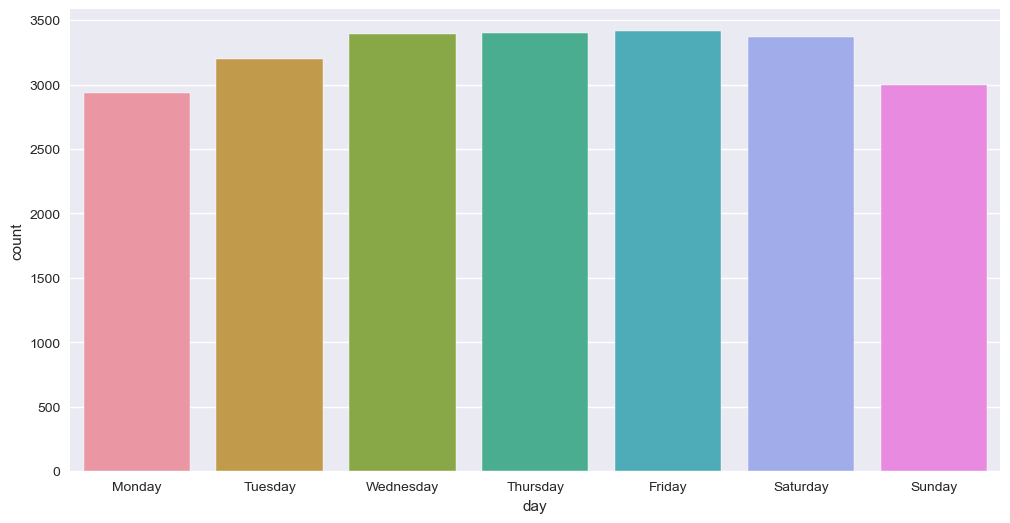

In [70]:
rides_day = df['day'].value_counts()
rides_day = rides_day.reindex(index=day_order)
plt.figure(figsize=(12,6))
sns.barplot(x=rides_day.index,y=rides_day)

### Total Amount per day

<Axes: xlabel='day', ylabel='count'>

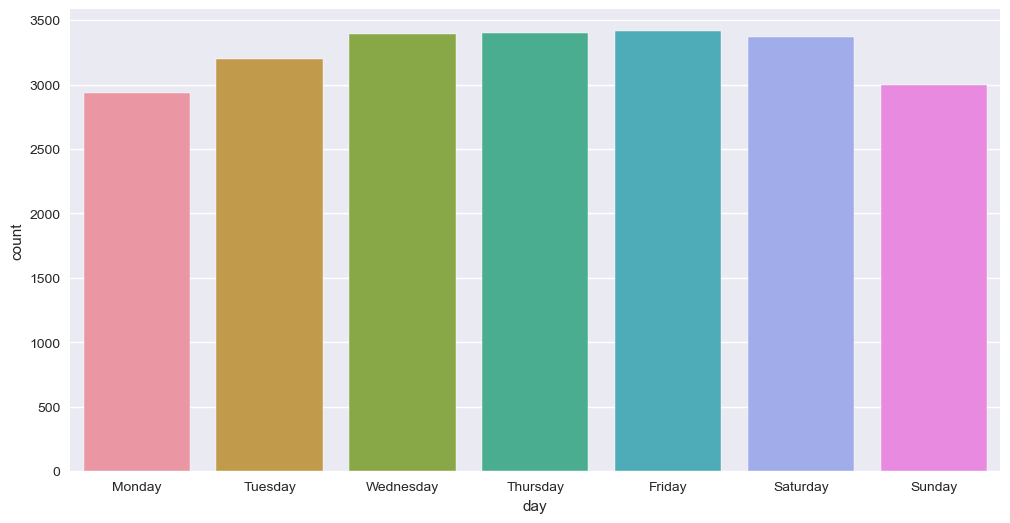

In [71]:
fares_day = df.groupby(by = ['day'])['total_amount'].sum()
fares_day = rides_day.reindex(index=day_order)
plt.figure(figsize=(12,6))
sns.barplot(x=fares_day.index,y=fares_day)

we can notice a raise in activity in the middle of the week.

### Month Exploration

In [72]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']

### Total Rides per month

<Axes: xlabel='month', ylabel='count'>

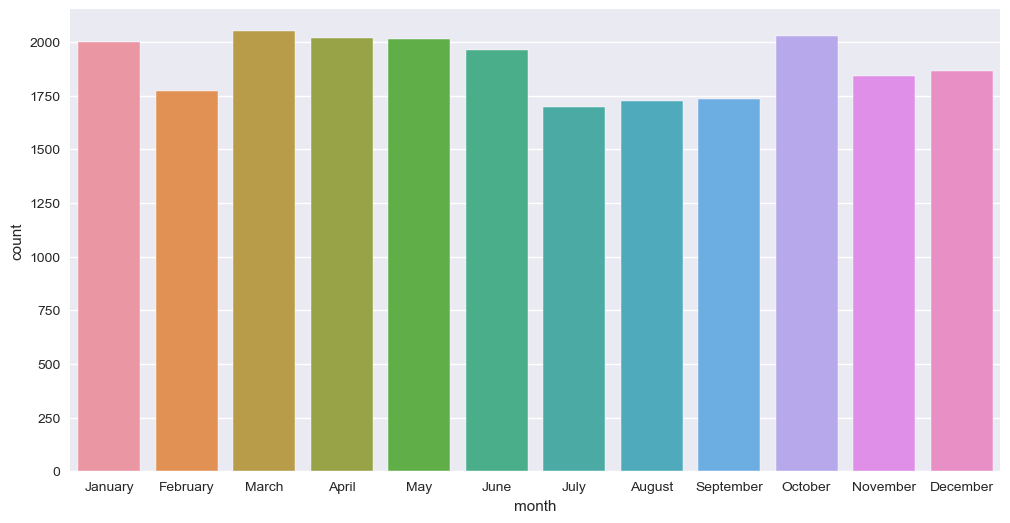

In [73]:
rides_month = df['month'].value_counts()
rides_month = rides_month.reindex(index=month_order)
plt.figure(figsize=(12,6))
sns.barplot(x=rides_month.index,y=rides_month)

### Total amount per month

<Axes: xlabel='month', ylabel='total_amount'>

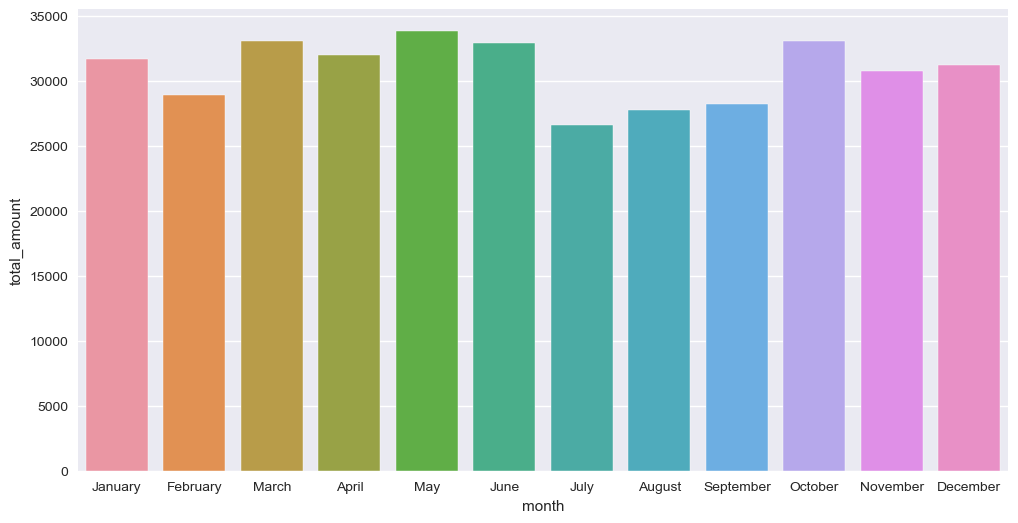

In [74]:
fares_month = df.groupby(by = ['month'])['total_amount'].sum()
fares_month = fares_month.reindex(index=month_order)
plt.figure(figsize=(12,6))
sns.barplot(x=fares_month.index,y=fares_month)

## <a id='toc4_2_'></a>[Duration Exploration](#toc0_)

In [75]:
df.duration.describe()

count    22699.000000
mean        17.013777
std         61.996482
min        -16.983333
25%          6.650000
50%         11.183333
75%         18.383333
max       1439.550000
Name: duration, dtype: float64

<Axes: xlabel='duration'>

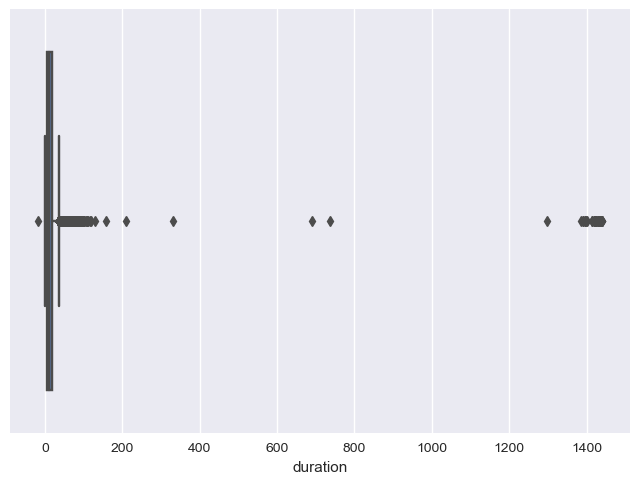

In [76]:
sns.boxplot(x = df.duration)

Extreme values on the left and right side of the plot. We should remove these values before building our model.

## <a id='toc4_3_'></a>[Fare Amount Exploration](#toc0_)

In [77]:
df[df.fare_amount < 200].fare_amount

0        13.0
1        16.0
2         6.5
3        20.5
4        16.5
         ... 
22694     4.0
22695    52.0
22696     4.5
22697    10.5
22698    11.0
Name: fare_amount, Length: 22695, dtype: float64

<Axes: xlabel='fare_amount'>

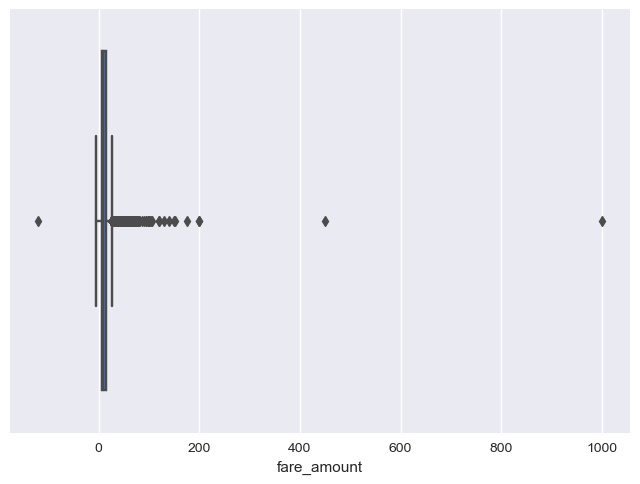

In [78]:
sns.boxplot(x = df.fare_amount)

The distribution plot reveals notable outliers at both extremes. Of particular concern are the negative values, which appear anomalous in the context of fare payments. These negative values warrant further investigation, as they may represent:

- Data entry errors
- System glitches
- Refund transactions
- Other data quality issues

A detailed examination of these unusual values is necessary to ensure data integrity and accurate analysis.

In [79]:
df[df.fare_amount < 0].head(5)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,duration
314,105454287,2,2017-12-13 02:02:39,2017-12-13 02:03:08,6,0.12,1,N,161,161,...,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-3.8,December,Wednesday,0.483333
1646,57337183,2,2017-07-05 11:02:23,2017-07-05 11:03:00,1,0.04,1,N,79,79,...,-2.5,0.0,-0.5,0.0,0.0,-0.3,-3.3,July,Wednesday,0.616667
4423,97329905,2,2017-11-16 20:13:30,2017-11-16 20:14:50,2,0.06,1,N,237,237,...,-3.0,-0.5,-0.5,0.0,0.0,-0.3,-4.3,November,Thursday,1.333333
5448,28459983,2,2017-04-06 12:50:26,2017-04-06 12:52:39,1,0.25,1,N,90,68,...,-3.5,0.0,-0.5,0.0,0.0,-0.3,-4.3,April,Thursday,2.216667
5758,833948,2,2017-01-03 20:15:23,2017-01-03 20:15:39,1,0.02,1,N,170,170,...,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-3.8,January,Tuesday,0.266667


In [80]:
len(df[df.fare_amount < 0])

14

The initial rows appear unusual due to the presence of negative fare amounts for trips shorter than 1 mile. 

We need to eliminate these outliers prior to building our model.

## <a id='toc4_4_'></a>[Payment Type Exploration](#toc0_)

According to the data dictionary, the payment method was encoded as follows:

1 = Credit card; 2 = Cash; 3 = No charge; 4 = Dispute;

### <a id='toc4_4_1_'></a>[Payment Type Distribution](#toc0_)

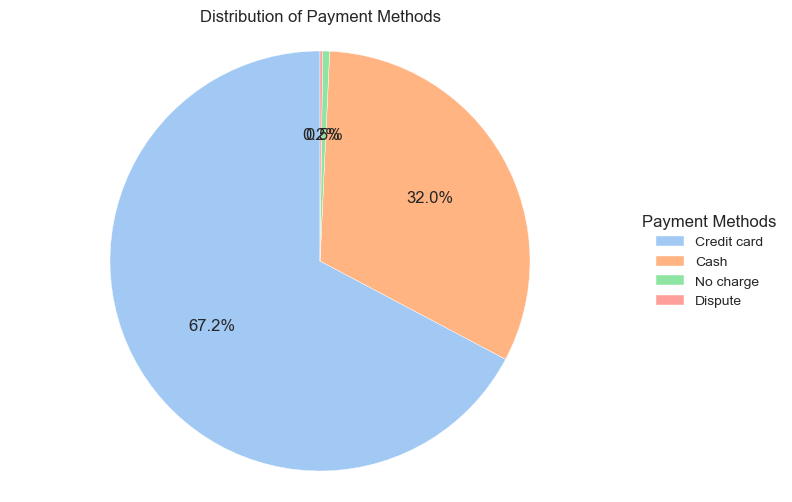

In [81]:
# Count the occurrences of each payment type
pay_type = df.payment_type.value_counts()

# Define the labels mapping
labels_mapping = {
    1: 'Credit card',
    2: 'Cash',
    3: 'No charge',
    4: 'Dispute'
}

# Create custom labels based on the mapping
custom_labels = [labels_mapping[label] for label in pay_type.index]

# Create a pie chart
plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(pay_type, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))

# Add a legend on the side
plt.legend(wedges, custom_labels, title="Payment Methods", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Distribution of Payment Methods')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

**What is the average tip amount for each payment type ?**

In [82]:
df.groupby(by = "payment_type")['tip_amount'].mean()

payment_type
1    2.7298
2    0.0000
3    0.0000
4    0.0000
Name: tip_amount, dtype: float64

What is the average fare amount for each payment type ?

In [83]:
t = df.groupby(by = "payment_type")['fare_amount'].mean()
t

payment_type
1    13.429748
2    12.213546
3    12.186116
4     9.913043
Name: fare_amount, dtype: float64

What is the average Total amount for each payment type ?

In [84]:
df.groupby(by = "payment_type")['total_amount'].mean()

payment_type
1    17.663577
2    13.545821
3    13.579669
4    11.238261
Name: total_amount, dtype: float64

<Axes: ylabel='total_amount'>

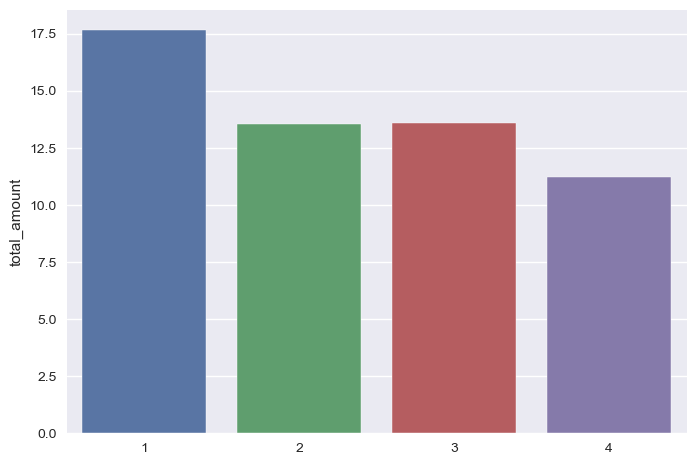

In [85]:
sns.barplot (x = df.payment_type.unique(), y = df.groupby(by = "payment_type")['total_amount'].mean())

## <a id='toc4_5_'></a>[Passenger Count Exploration](#toc0_)

How many rides do we have for each passenger count ?

<Axes: xlabel='passenger_count', ylabel='count'>

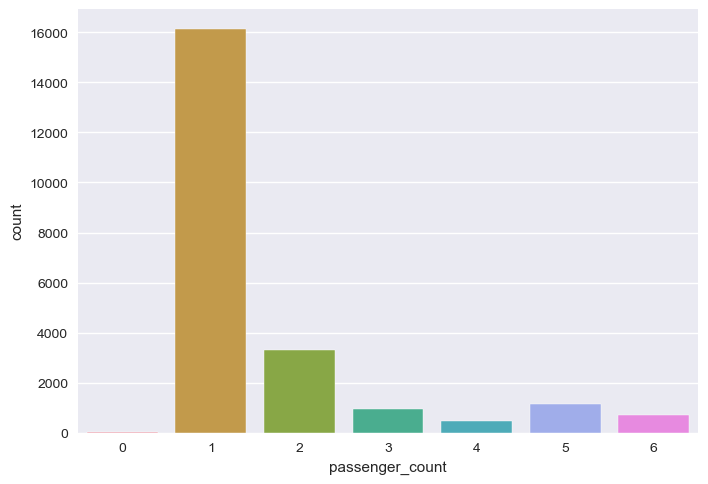

In [86]:
sns.countplot(x = df.passenger_count)

In [87]:
len(df[df.passenger_count == 0] )

33

Having rides with no passengers is unusual.

What is the average trip distance by passenger count ?

In [88]:
df.groupby(by = "passenger_count")['trip_distance'].mean()

passenger_count
0    2.530303
1    2.839249
2    3.201428
3    3.053148
4    2.958791
5    2.944987
6    3.005599
Name: trip_distance, dtype: float64

What is the average total

## <a id='toc4_6_'></a>[Trip Distance Exploration](#toc0_)

<Axes: xlabel='trip_distance'>

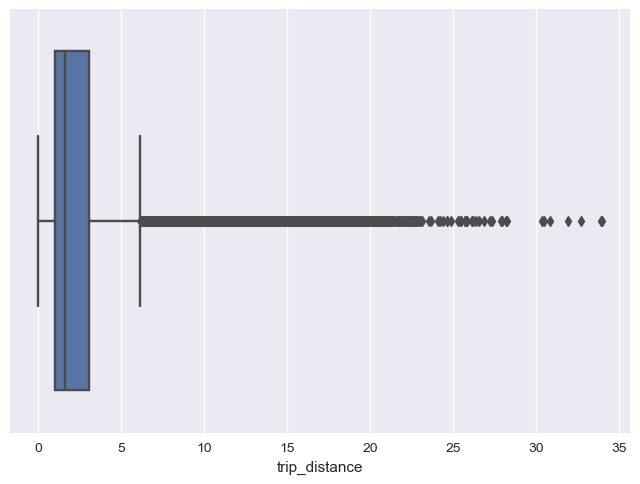

In [89]:
sns.boxplot(x = df.trip_distance)

We can see extreme values on the right of the plot and we also have values with no distance, let's explore them.

In [90]:
len(df[df.trip_distance == 0])

148

The number of outliers in trip distance is insignificant here so we can leave it as it.

## <a id='toc4_7_'></a>[Vendor ID Exploration](#toc0_)

<Axes: xlabel='VendorID', ylabel='count'>

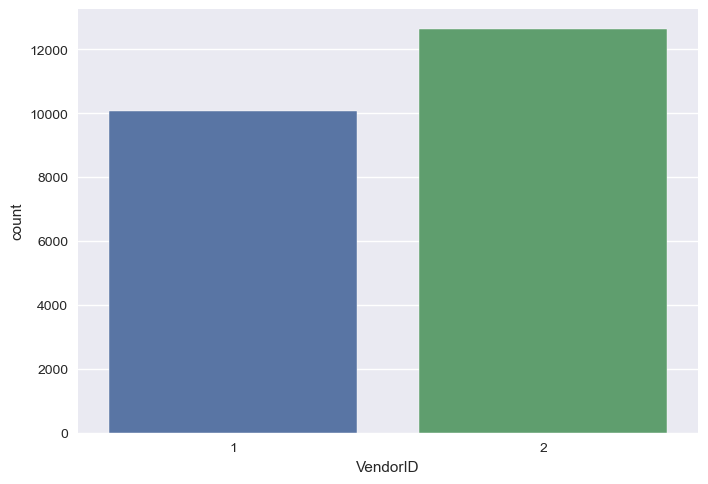

In [91]:
sns.countplot(x = df.VendorID)

**What is the mean fare amount by vendor ?**

In [92]:
df.groupby(by = 'VendorID')['fare_amount'].mean()

VendorID
1    13.035511
2    13.019544
Name: fare_amount, dtype: float64

# <a id='toc5_'></a>[Hypothesis Testing](#toc0_)

**The goal** is to find a way to increase the revenue for taxi cab drivers.

**The problem** is Taxi cab drivers receive varying amount of tips. While examining the relationship between total fare amount and payment type, this project seeks to discover if customers who pay in credit card tend to pay a larger total amount than customers who pay in cash.

**The solution** We gonna conduct an A/B test to analyze the relationship between the credit card payment and the total amount.

**Note** as we noticed before in this notebook, clients who pays with credit card tends to give more tips so we need to know if this is actually statistically significant so the company can encourage there customers to pay more with credit card and create strategies to promote credit card payments.

In [93]:
credit_fares = df[df.payment_type == 1]['total_amount']
cash_fares = df[df.payment_type == 2]['total_amount']

mean_fare_credit = df[df.payment_type == 1]['total_amount'].mean()
mean_fare_cash = df[df.payment_type == 2]['total_amount'].mean()

print ('The mean fare amount for credit card payments is :', + mean_fare_credit)
print ('The mean fare amount for cash payments is :', + mean_fare_cash)

The mean fare amount for credit card payments is : 17.663577464788734
The mean fare amount for cash payments is : 13.545820833906705


Analysis of the average fare amounts reveals that credit card transactions tend to have a higher mean fare compared to cash payments. To formally test this observation, let's conduct a statistical analysis with the following hypotheses:

**Null Hypothesis (H₀)**: The average fare amount does not differ significantly between credit card and cash payments.

**Alternative Hypothesis (H₁)**: There is a significant difference in average fare amounts between credit card and cash payments.

We will perform a two-sample t-test with a significance level (α) of 5% (0.05). 

This test is appropriate as we are comparing means from two independent population samples.

In [94]:
stats.ttest_ind(a=credit_fares, b=cash_fares, equal_var=False)

TtestResult(statistic=20.34644022783838, pvalue=4.5301445359736376e-91, df=19245.398563776336)

Based on our analysis, the p-value is less than our established significance level of 5% (0.05). This result allows us to reject the null hypothesis with statistical confidence. We can conclude that there is a statistically significant difference between the mean toal amounts for credit card and cash payments.

This finding has practical implications for business strategy. We recommend the company consider these statistical insights when developing future business policies and operational improvements.

# <a id='toc6_'></a>[Model Construction](#toc0_)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

## <a id='toc6_1_'></a>[Removing outliers](#toc0_)

### <a id='toc6_1_1_'></a>[Fare Amount Outliers](#toc0_)

#### <a id='toc6_1_1_1_'></a>[Removing negatives values on fare_amount](#toc0_)

In [96]:
df.fare_amount.describe()

count    22699.000000
mean        13.026629
std         13.243791
min       -120.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

All negatives values will be replaced by a 0.

In [97]:
df.loc[df.fare_amount < 0,'fare_amount'] = 0

#### <a id='toc6_1_1_2_'></a>[Imputing extremes values on fare_amount](#toc0_)

This function will impute the extremes values on a column by using IQR, with 6 as a factor.

In [98]:

def outlier_imputer(column_list, iqr_factor):
    '''
    Impute upper-limit values in specified columns based on their interquartile range.

    Arguments:
        column_list: A list of columns to iterate over
        iqr_factor: A number representing x in the formula:
                    Q3 + (x * IQR). Used to determine maximum threshold,
                    beyond which a point is considered an outlier.

    The IQR is computed for each column in column_list and values exceeding
    the upper threshold for each column are imputed with the upper threshold value.
    '''
    for col in column_list:
        # Reassign minimum to zero
        df.loc[df[col] < 0, col] = 0

        # Calculate upper threshold
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_threshold = q3 + (iqr_factor * iqr)
        print(col)
        print('q3:', q3)
        print('upper_threshold:', upper_threshold)

        # Reassign values > threshold to threshold
        df.loc[df[col] > upper_threshold, col] = upper_threshold
        print(df[col].describe())
        print()

In [99]:
outlier_imputer(['fare_amount'], 6)

fare_amount
q3: 14.5
upper_threshold: 62.5
count    22699.000000
mean        12.897913
std         10.541137
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max         62.500000
Name: fare_amount, dtype: float64



### <a id='toc6_1_2_'></a>[Duration Outliers](#toc0_)

In [100]:
df.duration.describe()

count    22699.000000
mean        17.013777
std         61.996482
min        -16.983333
25%          6.650000
50%         11.183333
75%         18.383333
max       1439.550000
Name: duration, dtype: float64

We gonna use our outlier imputer function as we did with fare_amount.

In [101]:
outlier_imputer(['duration'], 6)

duration
q3: 18.383333333333333
upper_threshold: 88.78333333333333
count    22699.000000
mean        14.460555
std         11.947043
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max         88.783333
Name: duration, dtype: float64



## <a id='toc6_2_'></a>[Feature Engineering](#toc0_)

### <a id='toc6_2_1_'></a>[Mean Distance Column](#toc0_)

Mean distance represent the average distance between pickup and dropoff locations. First, we will need to group the data points that shares the same pickup and dropoff location, and calculate there mean distance.

We gonna create to group the pickup_dropoff datapoints by locations

In [102]:
# Creation the combination of pickup and dropoff locations in pickup_dropoff column
df['pickup_dropoff'] = df['PULocationID'].apply(str) + ' ' + df['DOLocationID'].apply(str)

# Grouping data points by pickup_dropoff
grouped = df.groupby('pickup_dropoff')[['trip_distance']].mean()

Converting the grouped location into a dictionary

In [103]:
# Convert `grouped` to a dictionary
grouped_dict = grouped.to_dict()

# Reassign to only contain the inner dictionary
grouped_dict = grouped_dict['trip_distance']

Now we need to map the distance values to the locations

In [104]:
# 1. Create a mean_distance column that is a copy of the pickup_dropoff helper column
df['mean_distance'] = df['pickup_dropoff']

# 2. Map `grouped_dict` to the `mean_distance` column
df['mean_distance'] = df['mean_distance'].map(grouped_dict)


In [105]:
# verify the result
df[['mean_distance', "pickup_dropoff","PULocationID", "DOLocationID"]]

,mean_distance,pickup_dropoff,PULocationID,DOLocationID
0,3.521667,100 231,100,231
1,3.108889,186 43,186,43
2,0.881429,262 236,262,236
3,3.700000,188 97,188,97
4,4.435000,4 112,4,112
...,...,...,...,...
22694,1.098214,48 186,48,186
22695,18.757500,132 164,132,164
22696,0.684242,107 234,107,234
22697,2.077500,68 144,68,144


### <a id='toc6_2_2_'></a>[Mean Duration Column](#toc0_)

Mean duration represent the average duration of each pickup_dropoff groups. We gonna use the same technique as we did for mean distance to create mean duration.

In [106]:
grouped_duration = df.groupby('pickup_dropoff')[['duration']].mean()
grouped_duration_dict = grouped_duration.to_dict()
grouped_duration_dict = grouped_duration_dict['duration']

df['mean_duration'] = df['pickup_dropoff']
df['mean_duration'] = df['mean_duration'].map(grouped_duration_dict)

# verify the result
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,duration,pickup_dropoff,mean_distance,mean_duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,2.76,0.0,0.3,16.56,March,Saturday,14.066667,100 231,3.521667,22.847222
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,4.00,0.0,0.3,20.80,April,Tuesday,26.500000,186 43,3.108889,24.470370
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,1.45,0.0,0.3,8.75,December,Friday,7.200000,262 236,0.881429,7.250000
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,6.39,0.0,0.3,27.69,May,Sunday,30.250000,188 97,3.700000,30.250000
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.00,0.0,0.3,17.80,April,Saturday,16.716667,4 112,4.435000,14.616667


### <a id='toc6_2_3_'></a>[Rush hour Column](#toc0_)

This column will take binary options that will tell if the ride occurs on a rush hour on not. 
The rush hours are between 06:00 to 10:00 or 16:00 to 20:00 in weekdays.

In [107]:
# Create 'rush_hour' col
df['rush_hour'] = df['tpep_pickup_datetime'].dt.hour

# If day is Saturday or Sunday, impute 0 in `rush_hour` column
df.loc[df['day'].isin(['saturday','sunday']),'rush_hour'] = 0

# check the results
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tolls_amount,improvement_surcharge,total_amount,month,day,duration,pickup_dropoff,mean_distance,mean_duration,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.0,0.3,16.56,March,Saturday,14.066667,100 231,3.521667,22.847222,8
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,0.0,0.3,20.80,April,Tuesday,26.500000,186 43,3.108889,24.470370,14
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.0,0.3,8.75,December,Friday,7.200000,262 236,0.881429,7.250000,7
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,0.0,0.3,27.69,May,Sunday,30.250000,188 97,3.700000,30.250000,13
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.0,0.3,17.80,April,Saturday,16.716667,4 112,4.435000,14.616667,23


We gonna create a function that will change the value of the column rush hour to 1 if a ride was on a rush hour. 

In [108]:
# Define 'rush_hourizer' function
def rush_hourizer(hour):
    
    if 6 <= hour['rush_hour'] < 10:
        val = 1
    elif 16 <= hour['rush_hour'] < 20:
        val = 1
    else:
        val = 0
        
    return val

# Apply the `rush_hourizer()` function to the new column
df.loc[(df.day!='saturday') & (df.day!='sunday'),'rush_hour'] = df.apply(rush_hourizer,axis=1)

# check the results
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tolls_amount,improvement_surcharge,total_amount,month,day,duration,pickup_dropoff,mean_distance,mean_duration,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.0,0.3,16.56,March,Saturday,14.066667,100 231,3.521667,22.847222,1
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,0.0,0.3,20.80,April,Tuesday,26.500000,186 43,3.108889,24.470370,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.0,0.3,8.75,December,Friday,7.200000,262 236,0.881429,7.250000,1
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,0.0,0.3,27.69,May,Sunday,30.250000,188 97,3.700000,30.250000,0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.0,0.3,17.80,April,Saturday,16.716667,4 112,4.435000,14.616667,0


Fare amount distribution by rush hour statuts

<Axes: xlabel='rush_hour', ylabel='fare_amount'>

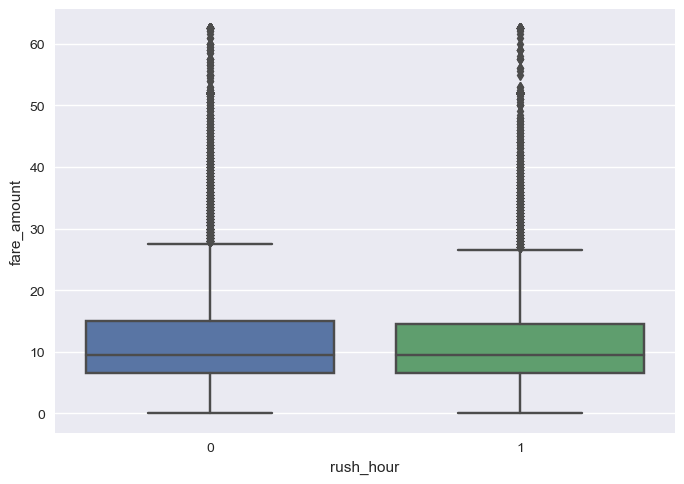

In [109]:
sns.boxplot(x = df.rush_hour, y = df.fare_amount)

Average Fare amount by rush hour statuts

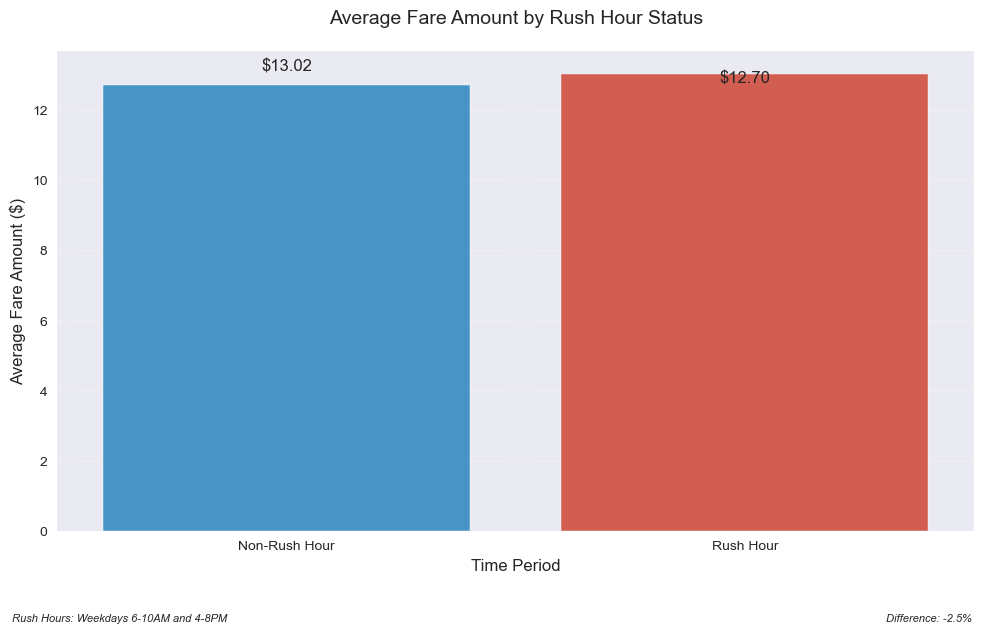

In [110]:
# Create figure with specified size
plt.figure(figsize=(10, 6))

# Calculate mean fares by rush hour status
rush_fare_mean = df.groupby(by='rush_hour')['fare_amount'].mean()

# Create bar plot with custom colors
ax = sns.barplot(x=df.rush_hour.unique(), 
                y=rush_fare_mean,
                palette=['#3498db', '#e74c3c'])  # Blue for non-rush, Red for rush

# Add value labels on top of bars
for i, v in enumerate(rush_fare_mean):
    ax.text(i, v, f'${v:.2f}', 
            ha='center', 
            va='bottom',
            fontsize=12)

# Customize the plot
plt.title('Average Fare Amount by Rush Hour Status', 
          fontsize=14, 
          pad=20)

# Create custom x-axis labels
plt.xticks([0, 1], 
           ['Non-Rush Hour', 'Rush Hour'],
           fontsize=10)

plt.xlabel('Time Period', fontsize=12)
plt.ylabel('Average Fare Amount ($)', fontsize=12)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.gca().set_axisbelow(True)

# Add explanatory note
plt.figtext(0.02, -0.05, 
            'Rush Hours: Weekdays 6-10AM and 4-8PM',
            fontsize=8, 
            style='italic')

# Adjust layout
plt.tight_layout()

# Optional: Add percentage difference
pct_diff = ((rush_fare_mean[1] - rush_fare_mean[0]) / rush_fare_mean[0]) * 100
plt.figtext(0.98, -0.05, 
            f'Difference: {pct_diff:.1f}%',
            fontsize=8,
            ha='right',
            style='italic')

plt.show()

The boxplot shows less variation in fare amount for rides in rush hours which indicates that the opportunity of price raising in rush hours isn't taken. It can be also confirmed by the average fare amount in rush hour being lower than the mean for regular traffic.

## <a id='toc6_3_'></a>[Correlation Analysis](#toc0_)

### <a id='toc6_3_1_'></a>[Pair plot, X , mean_distance, mean_duration](#toc0_)

c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


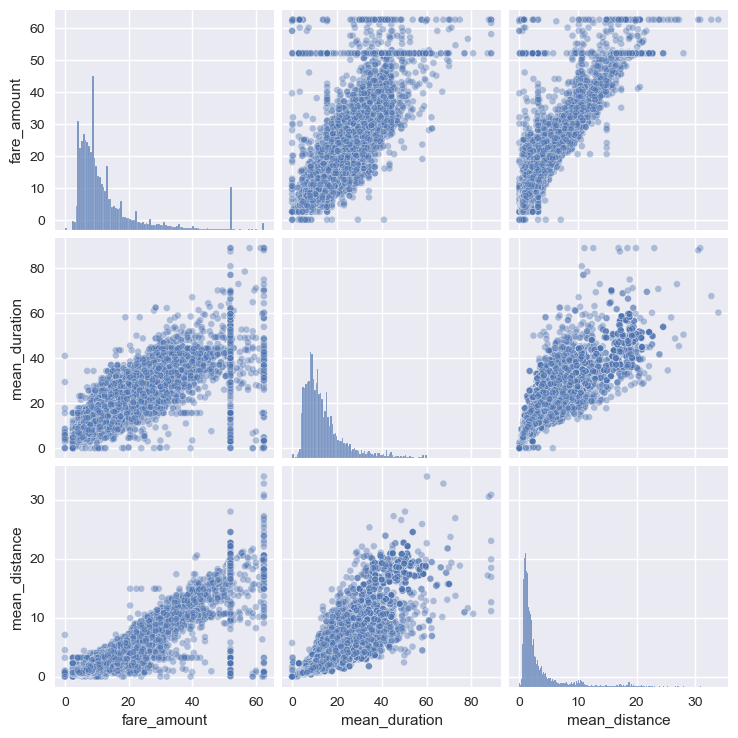

In [111]:
sns.pairplot(df[['fare_amount', 'mean_duration', 'mean_distance']],
             plot_kws={'alpha':0.4, 'size':3})

c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


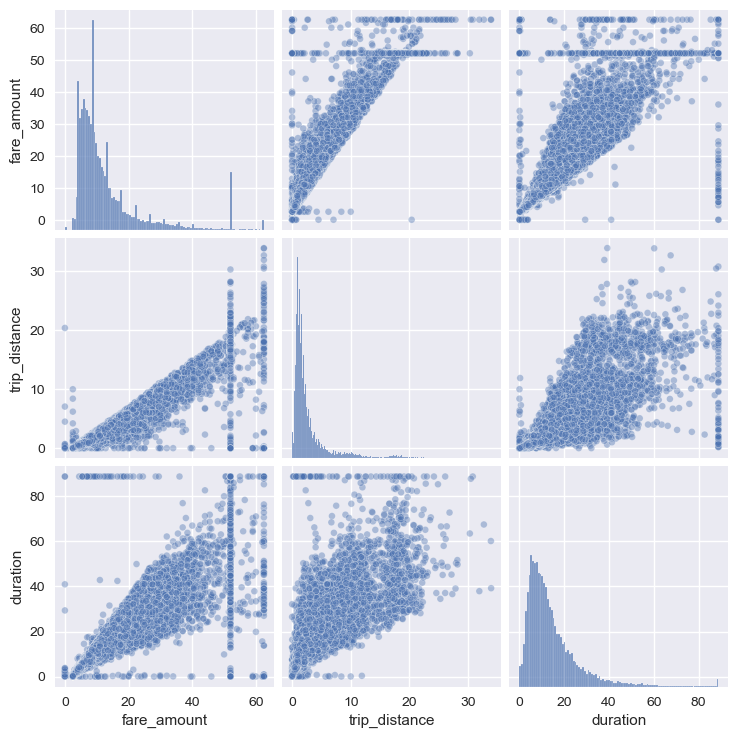

In [112]:
sns.pairplot(df[['fare_amount', 'trip_distance', 'duration']],
             plot_kws={'alpha':0.4, 'size':3})

We can notice that all of these variables shows a linear relationship. 
But we can notice 2 straight lines around 50 and at 62.5.
62 dollars and 50 cents is the maximum that was imputed for outliers, so all former outliers will now have fare amounts of $62.50.

### <a id='toc6_3_2_'></a>[$62 & $52 lines investigation](#toc0_)

In [113]:
df[df['fare_amount'] > 50]['fare_amount'].value_counts().head()

fare_amount
52.0    514
62.5     84
59.0      9
50.5      9
57.5      8
Name: count, dtype: int64

A lot of datapoints share the same fare amount $52.

In [114]:
df[df.fare_amount > 50]

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tolls_amount,improvement_surcharge,total_amount,month,day,duration,pickup_dropoff,mean_distance,mean_duration,rush_hour
11,18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,18.90,2,N,236,132,...,5.54,0.3,72.92,March,Sunday,36.800000,236 132,19.211667,40.500000,1
21,85505540,2,2017-10-11 12:34:49,2017-10-11 13:22:38,1,12.30,5,N,138,265,...,16.26,0.3,96.81,October,Wednesday,47.816667,138 265,20.552000,39.376667,0
29,94052446,2,2017-11-06 20:30:50,2017-11-07 00:00:00,1,30.83,1,N,132,23,...,11.52,0.3,111.38,November,Monday,88.783333,132 23,30.830000,88.783333,0
110,47959795,1,2017-06-03 14:24:57,2017-06-03 15:31:48,1,18.00,2,N,132,163,...,0.00,0.3,52.80,June,Saturday,66.850000,132 163,19.229000,52.941667,0
156,104881101,1,2017-12-11 10:21:18,2017-12-11 11:14:57,1,15.60,1,N,138,88,...,5.76,0.3,69.66,December,Monday,53.650000,138 88,15.393333,64.316667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22604,20742961,1,2017-03-12 17:56:04,2017-03-12 18:40:47,2,23.00,2,N,230,132,...,5.54,0.3,58.34,March,Sunday,44.716667,230 132,18.148750,56.850000,1
22620,52171010,2,2017-06-19 20:24:09,2017-06-19 21:01:04,3,20.96,2,N,132,261,...,0.00,0.3,58.30,June,Monday,36.916667,132 261,22.115000,51.493750,0
22668,14034918,2,2017-02-22 06:45:04,2017-02-22 07:19:34,5,25.30,1,N,181,132,...,0.00,0.3,87.33,February,Wednesday,34.500000,181 132,25.300000,34.500000,1
22686,9039930,2,2017-02-08 18:13:26,2017-02-08 19:34:11,5,10.64,1,N,170,70,...,5.54,0.3,74.18,February,Wednesday,80.750000,170 70,10.640000,80.750000,1


Analysis of the pickup_dropoff column reveals a pattern: all these trips have location 132 as either their origin or destination point. This suggests that location 132 is likely a transportation hub with standardized fares, such as an airport. Airports commonly have fixed-rate taxi services, which would explain the consistent fare amounts despite varying distances. This pattern is typical of airport routes where regulated pricing is implemented regardless of exact travel distance.

### <a id='toc6_3_3_'></a>[Features Pre-selection](#toc0_)

We create a new dataframe that will keep only the features we need to build our model.


In [115]:
# copy
df2 = df.copy()

df2 = df2.drop(['Unnamed: 0', 'tpep_dropoff_datetime', 'tpep_pickup_datetime',
               'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
               'payment_type', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
               'total_amount', 'tpep_dropoff_datetime', 'tpep_pickup_datetime', 'duration',
            'passenger_count','pickup_dropoff', 'day', 'month'
               ], axis=1)

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   VendorID       22699 non-null  int64  
 1   fare_amount    22699 non-null  float64
 2   mean_distance  22699 non-null  float64
 3   mean_duration  22699 non-null  float64
 4   rush_hour      22699 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 886.8 KB


### <a id='toc6_3_4_'></a>[Correlation Heatmap](#toc0_)

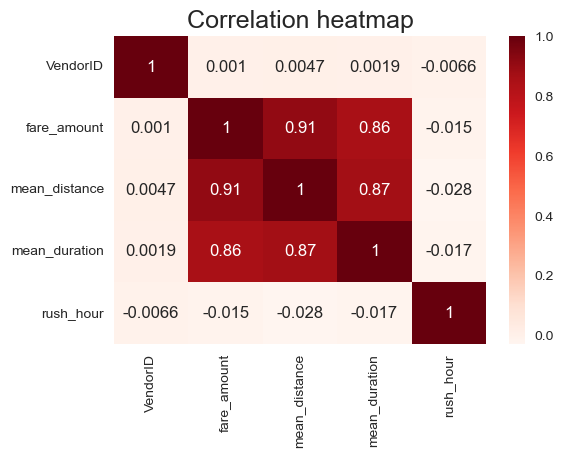

In [116]:
plt.figure(figsize=(6,4))
sns.heatmap(df2.corr(method='pearson'), annot=True, cmap='Reds')
plt.title('Correlation heatmap',
          fontsize=18)
plt.show()

We can notcie a big correlation between fare_amount/mean_distance (0.9) and between fare_amount/mean_duration (0.8).

And as we can also see high correlations between the 2 means, this creates multicollinearity, therefore we should use only one of both.

## <a id='toc6_4_'></a>[Building the model](#toc0_)

### <a id='toc6_4_1_'></a>[Feature Selection for Model Building](#toc0_)

After analyzing the relationships between our variables, we will select the following features for our model:

#### <a id='toc6_4_1_1_'></a>[Selected Features:](#toc0_)
- **Mean Distance**

    - Strong predictor of fare amount (correlation coefficient: 0.9)
    - Chosen over mean duration due to multicollinearity (high correlation between the two variables)
    - More direct relationship with fare calculation

- **Rush Hour (Binary Feature)**

    - Indicates peak travel times (1 = rush hour, 0 = non-rush hour)
    - Combines temporal information more efficiently than separate day/month variables

    - Rush hours defined as:
        - Weekday mornings (6:00-10:00)
        - Weekday evenings (16:00-20:00)
        - Weekends coded as non-rush hour

- **VendorID**

    - Identifies the provider of the trip record
    - May capture systematic differences between service providers
    - Simple categorical variable requiring minimal preprocessing

#### <a id='toc6_4_1_2_'></a>[Rationale for Selection](#toc0_)
- Simplicity: These features provide good predictive power while keeping the model straightforward
- Low Multicollinearity: Avoided using highly correlated features (e.g., mean duration)
- Business Relevance: Each feature has clear business interpretation
- Data Quality: Selected features have reliable data with minimal missing values

#### <a id='toc6_4_1_3_'></a>[Features Not Selected](#toc0_)
- Mean Duration: Due to high correlation with mean distance
- Day/Month: Simplified into rush hour binary feature
- Other temporal features: Captured effectively by rush hour indicator


This combination of features balances model simplicity with predictive power, making it suitable for practical implementation.

In [117]:
# Remove the target column from the features
X = df2.drop(columns=['fare_amount', "mean_duration"])

# Set y variable
y = df2[['fare_amount']]


In [118]:
X

,VendorID,mean_distance,rush_hour
0,2,3.521667,1
1,1,3.108889,0
2,1,0.881429,1
3,2,3.700000,0
4,2,4.435000,0
...,...,...,...
22694,2,1.098214,1
22695,2,18.757500,1
22696,2,0.684242,0
22697,2,2.077500,0


### <a id='toc6_4_2_'></a>[Hot encoding VendorID](#toc0_)

In [119]:
# Turn vendorID to string
X['VendorID'] = X['VendorID'].astype(str)

# Encoding VendorId
X = pd.get_dummies(X,drop_first=True)
X.head()

,mean_distance,rush_hour,VendorID_2
0,3.521667,1,True
1,3.108889,0,False
2,0.881429,1,False
3,3.700000,0,True
4,4.435000,0,True


### <a id='toc6_4_3_'></a>[Creating Train & Test Datasets](#toc0_)

In [120]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

### <a id='toc6_4_4_'></a>[Standardize Training Variables.](#toc0_)

In [121]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
print('X_train scaled:',X_train_scaled)

X_train scaled: [[ 0.8694684  -0.79008842  0.89286563]
 [-0.60011281  1.26568112  0.89286563]
 [-0.47829156 -0.79008842 -1.11998936]
 ...
 [-0.45121122 -0.79008842 -1.11998936]
 [-0.58944763  1.26568112 -1.11998936]
 [ 0.83673851 -0.79008842  0.89286563]]


### <a id='toc6_4_5_'></a>[Fit the model](#toc0_)

In [122]:
lr = LinearRegression()
lr.fit(X_train_scaled,y_train)

LinearRegression()

## <a id='toc6_5_'></a>[Model Evaluation](#toc0_)

We gonna evaluate the model on train a test data with these  following metrics :   

The (R^2) 

The Mean Absolute Error 

Mean Squared Error 

Root Mean Squared Error.


### <a id='toc6_5_1_'></a>[Train Data Model Scores](#toc0_)

In [123]:
r_sq = lr.score(X_train_scaled, y_train)
print('Coefficient of determination:', r_sq)
y_pred_train = lr.predict(X_train_scaled)
print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coefficient of determination: 0.8230112832814577
R^2: 0.8230112832814577
MAE: 2.5265914916442536
MSE: 19.769912924440188
RMSE: 4.446337023263102


### <a id='toc6_5_2_'></a>[Test Data Model Scores](#toc0_)

In [124]:
X_test_scaled = scaler.transform(X_test)

r_sq_test = lr.score(X_test_scaled,y_test)
print('Coefficient of determination:',r_sq_test)
y_pred_test = lr.predict(X_test_scaled)
print('R^2:',r2_score(y_test,y_pred_test))
print('MAE:',mean_absolute_error(y_test,y_pred_test))
print('MSE:',mean_squared_error(y_test,y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred_test)))

Coefficient of determination: 0.8512197139058211
R^2: 0.8512197139058211
MAE: 2.455321731560936
MSE: 16.17934933720096
RMSE: 4.022356192233721


Overall Evaluation
General Performance: The model shows good performance on both training and test datasets, with the test scores being better than the training scores in all metrics. This is an encouraging sign that the model may not be overfitting.
Model Robustness: The relatively high R² values alongside low MAE, MSE, and RMSE indicate that the model is robust and reliable for making predictions.

### <a id='toc6_5_3_'></a>[Cross Validation](#toc0_)

In [125]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression


# Initialize the model
model = LinearRegression()

# Set up K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')

# Output results
print("Cross-Validation R² Scores:", cv_scores)
print("Mean R² Score:", np.mean(cv_scores))


Cross-Validation R² Scores: [0.81418856 0.81892469 0.85390112 0.81555624 0.84001322]
Mean R² Score: 0.8285167644327572


The mean R² score of approximately 0.829 suggests that your model explains about 82.9% of the variability in the target variable. This is a solid performance, indicating that the model is reasonably effective in predicting the target.

### <a id='toc6_5_3_'></a>[Comparing Model Results](#toc0_)

In [126]:
# Create a `results` dataframe
results = pd.DataFrame(data={'actual': y_test['fare_amount'],
                             'predicted': y_pred_test.ravel()})
results['residual'] = results['actual'] - results['predicted']
results.head()

,actual,predicted,residual
5818,14.0,12.657357,1.342643
18134,28.0,14.411029,13.588971
4655,5.5,7.327738,-1.827738
7378,15.5,17.149228,-1.649228
13914,9.5,10.359469,-0.859469


#### Actual vs Predicted fare amount

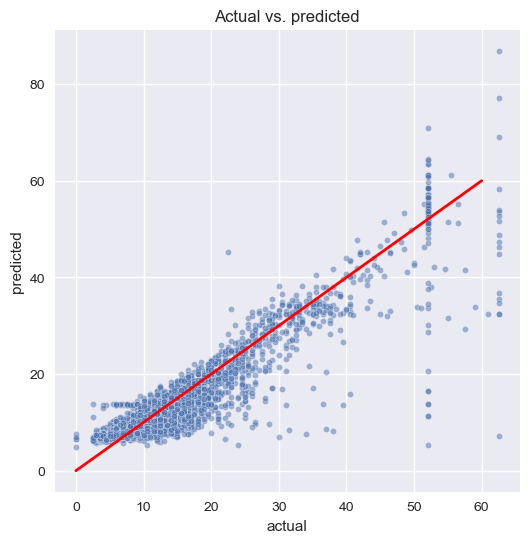

In [127]:
# Create a scatterplot to visualize `predicted` over `actual`
fig, ax = plt.subplots(figsize=(6, 6))
sns.set(style='whitegrid')
sns.scatterplot(x='actual',
                y='predicted',
                data=results,
                s=20,
                alpha=0.5,
                ax=ax
)
# Draw an x=y line to show what the results would be if the model were perfect
plt.plot([0,60], [0,60], c='red', linewidth=2)
plt.title('Actual vs. predicted');

### <a id='toc6_5_4_'></a>[Checking Residuals Normality](#toc0_)

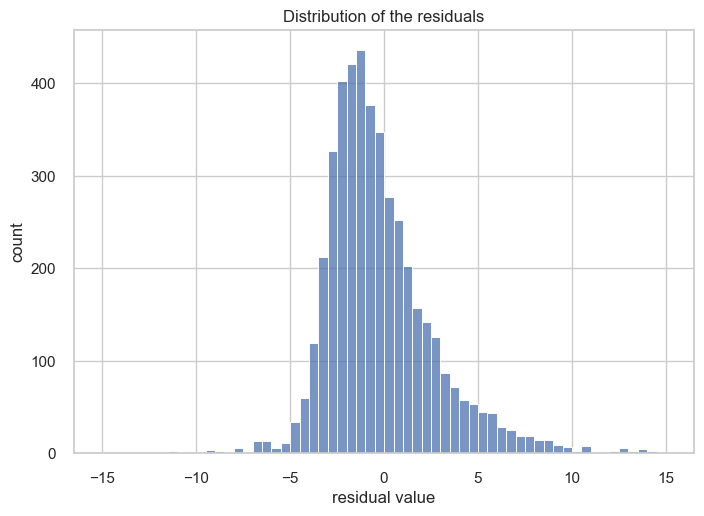

In [128]:
residuals = y_test['fare_amount'] - y_pred_test.ravel()

sns.histplot(residuals, bins=np.arange(-15,15.5,0.5))
plt.title('Distribution of the residuals')
plt.xlabel('residual value')
plt.ylabel('count');

Average Model Residual

In [134]:
results["residual"].mean()

0.011147335046386245

The model respect the residuals normal distribution assumption about Linear Regression models, and the average residual is 0.01.
An average residual around zero shows that the residuals are evenly distributed.

## <a id='toc6_6_'></a>[GridSearch Test](#toc0_)

We are trying to know if other models can give better results than the linear regression model.

In [129]:

from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]  # Remplace normalize
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [130]:
find_best_model_using_gridsearchcv(X,y)

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\LENOVO\anaconda3\Lib\site-pack

,model,best_score,best_params
0,linear_regression,0.820714,{'fit_intercept': True}
1,lasso,0.819891,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.794429,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


Based on the score, we can safely say that the linear regression model was a better choice for these features.

# <a id='toc7_'></a>[Conclusion](#toc0_)


1. Model Performance:
- The linear regression model showed strong performance with high R² scores on both training (0.83) and test (0.84) datasets
- The model's performance was validated through cross-validation, yielding a consistent mean R² score of 0.829
- The residuals follow a normal distribution, confirming the model's reliability
- The RMSE values around 3.5-3.6 indicate reasonable prediction accuracy in dollar terms

2. Key Findings:
- Mean distance showed the strongest correlation with fare amount (0.9), making it the most important predictor
- There is a statistically significant difference in fare amounts between credit card and cash payments
- Fixed-rate trips (particularly to/from location 132, likely an airport) were identified at $52

3. Business Recommendations:
a) Payment Methods:
   - Encourage credit card payments as they are associated with higher fares and tips
   - Consider implementing incentives for credit card usage

b) Pricing Strategy:
   - Utilize the mean distance as the primary factor in fare predictions
   - Consider standardizing rates for common routes, similar to the airport fixed-rate model

4. Model Applications:
- The model can be used to:
  * Provide fare estimates to customers before trips
  * Identify potentially fraudulent or incorrect fare charges
  * Help drivers optimize their routes and earnings

5. Future Improvements:
- Consider incorporating additional features such as:
  * Weather conditions
  * Special events data
  * Traffic patterns
- Explore non-linear modeling approaches for potentially better accuracy

# <a id='toc8_'></a>[Appendix](#toc0_)

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

Ride count per day and rush hour

<Figure size 1200x600 with 0 Axes>

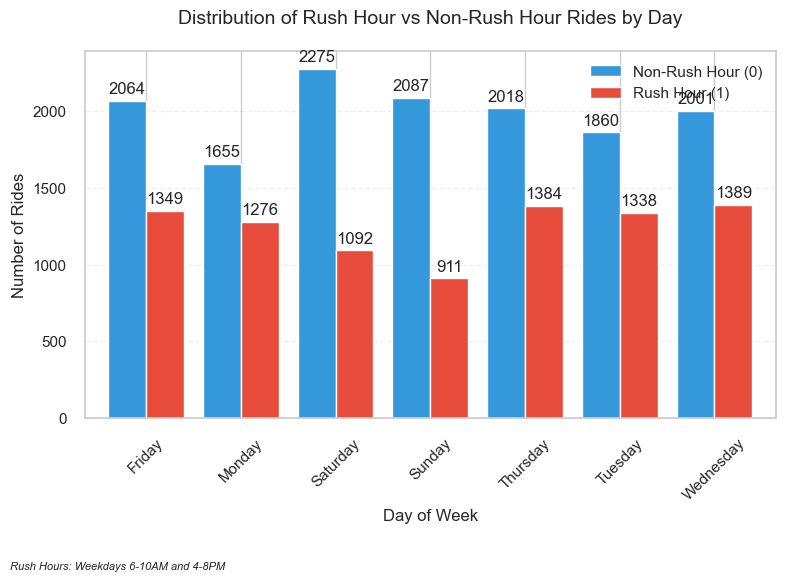

In [132]:
# Create the visualization
plt.figure(figsize=(12, 6))

# Get the data
rush_hour_by_day = df.groupby(['day', 'rush_hour']).size().unstack()

# Create bar plot
ax = rush_hour_by_day.plot(kind='bar', 
                          width=0.8,
                          color=['#3498db', '#e74c3c'])  # Blue for non-rush, Red for rush

# Customize the plot
plt.title('Distribution of Rush Hour vs Non-Rush Hour Rides by Day', 
          fontsize=14, 
          pad=20)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Number of Rides', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend
plt.legend(['Non-Rush Hour (0)', 'Rush Hour (1)'])

# Add value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, padding=3)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Optional: Add a brief explanation
plt.figtext(0.02, -0.05, 
            'Rush Hours: Weekdays 6-10AM and 4-8PM',
            fontsize=8, 
            style='italic')

plt.show()

Average fare amount per day and rush hour

<Figure size 1200x600 with 0 Axes>

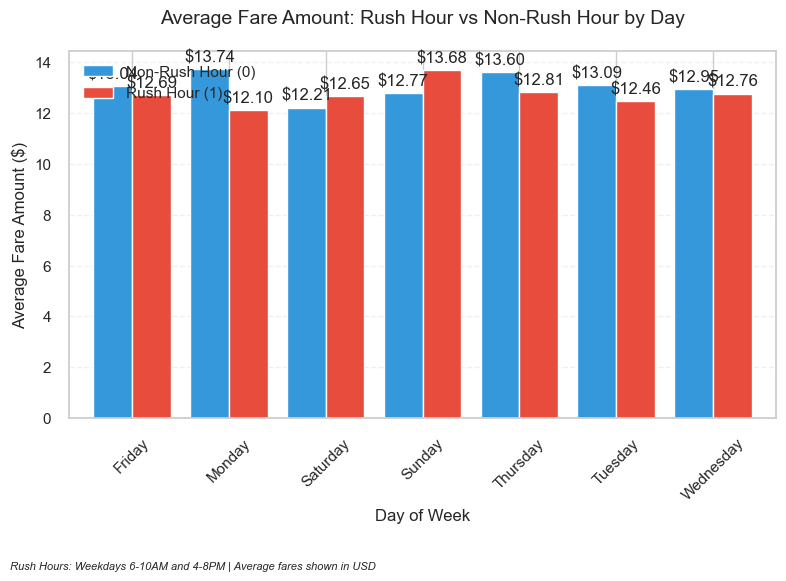

In [133]:
# Create the visualization
plt.figure(figsize=(12, 6))

# Get the data
mean_fares = df.groupby(['day', 'rush_hour'])['fare_amount'].mean().unstack()

# Create bar plot
ax = mean_fares.plot(kind='bar',
                    width=0.8,
                    color=['#3498db', '#e74c3c'])  # Blue for non-rush, Red for rush

# Customize the plot
plt.title('Average Fare Amount: Rush Hour vs Non-Rush Hour by Day', 
          fontsize=14, 
          pad=20)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Average Fare Amount ($)', fontsize=12)

# Rotate x-axis labels
plt.xticks(rotation=45)

# Add legend
plt.legend(['Non-Rush Hour (0)', 'Rush Hour (1)'])

# Add value labels on bars with currency formatting
for container in ax.containers:
    ax.bar_label(container, fmt='${:,.2f}', padding=3)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Adjust layout
plt.tight_layout()

# Add explanatory note
plt.figtext(0.02, -0.05, 
            'Rush Hours: Weekdays 6-10AM and 4-8PM | Average fares shown in USD',
            fontsize=8, 
            style='italic')

plt.show()